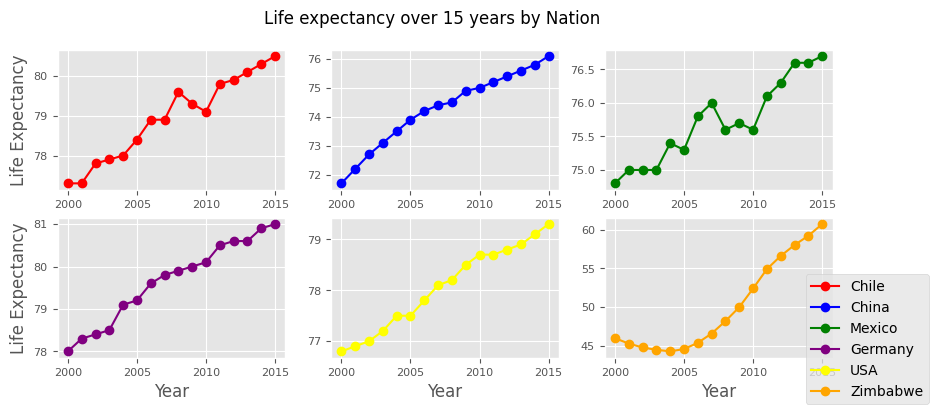

<Figure size 640x480 with 0 Axes>

In [344]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm

#Goals of this project:
#1. Has life expectancy increased over time in the six nations?
#2. Has GDP increased over time in each nation?
#3. Is there a correlation between GDP and life expectancy?
#4. What is the average life expectancy in each nation?
#5. What is the average GDP in each nation?

df = pd.read_csv('all_data.csv')
countries = df['Country'].tolist()

df.rename(columns = {'Life expectancy at birth (years)': 'LEB'}, inplace=True)
df.replace('United States of America', 'USA', inplace=True)

colors = {'Chile':'red', 'China':'blue', 'Mexico':'green', 'Germany':'purple', 'USA':'yellow', 'Zimbabwe':'orange'}

countries = ['Chile', 'China', 'Mexico', 'Germany', 'USA', 'Zimbabwe']

df.describe()

#1. Has life expectancy increased over time in the six nations?
#Subset data for this specific question
chile_leb = df.LEB[df.Country == 'Chile']
china_leb = df.LEB[df.Country == 'China']
mex_leb = df.LEB[df.Country == 'Mexico']
germ_leb = df.LEB[df.Country == 'Germany']
usa_leb = df.LEB[df.Country == 'USA']
zimb_leb = df.LEB[df.Country == 'Zimbabwe']

fig, axs = plt.subplots(2,3, figsize=(10,4))
fig.suptitle('Life expectancy over 15 years by Nation')
axs.flatten()
plt.subplot(2,3,1)
plt.plot(df.Year[df.Country =='Chile'], chile_leb, marker = 'o', color = 'red') 
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.ylabel('Life Expectancy')

plt.subplot(2,3,2)
plt.plot(df.Year[df.Country =='China'], china_leb, marker = 'o', color = 'blue')
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)

plt.subplot(2,3,3)
plt.plot(df.Year[df.Country =='Mexico'], mex_leb, marker = 'o', color = 'green')
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)

plt.subplot(2,3,4)
plt.plot(df.Year[df.Country =='Germany'], germ_leb, marker = 'o', color = 'purple')
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)

plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)

plt.subplot(2,3,5)
plt.plot(df.Year[df.Country =='USA'], usa_leb, marker = 'o', color = 'yellow')
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)
plt.xlabel('Year')

plt.subplot(2,3,6)
plt.plot(df.Year[df.Country =='Zimbabwe'], zimb_leb, marker = 'o', color = 'orange')
plt.yticks(fontsize = 8)
plt.xlabel('Year')

plt.xticks(fontsize = 8)
fig.legend(countries, loc='lower right')
plt.show()
plt.clf()
# Observation: It can be observed from the plots below that the answer to question number one is yes.
# Each nation has a trend upward with years gone by.

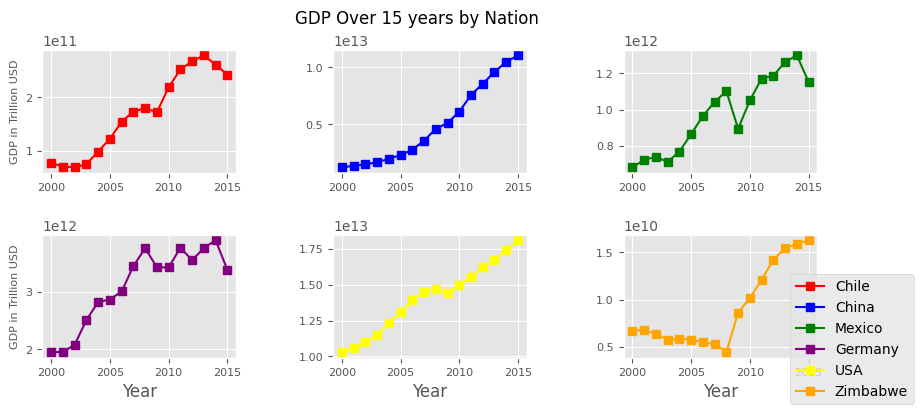

In [341]:
#2 has GDP increased overtime?
#Pulling subsets for GDP
chile_gdp = df.GDP[df.Country == 'Chile']
china_gdp = df.GDP[df.Country == 'China']
mex_gdp = df.GDP[df.Country == 'Mexico']
germ_gdp = df.GDP[df.Country == 'Germany']
usa_gdp = df.GDP[df.Country == 'USA']
zimb_gdp = df.GDP[df.Country == 'Zimbabwe']
fig, axs = plt.subplots(2,3, figsize=(10,4))
fig.suptitle('GDP Over 15 years by Nation')
axs.flatten()

plt.subplot(2,3,1)
plt.plot(df.Year[df.Country == 'Chile'], chile_gdp, marker = 's', color = 'red')
plt.ylabel('GDP in Trillion USD', fontsize = 8)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)

plt.subplot(2,3,2)
plt.plot(df.Year[df.Country =='China'], china_gdp, marker = 's', color = 'blue')
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)

plt.subplot(2,3,3)
plt.plot(df.Year[df.Country =='Mexico'], mex_gdp, marker = 's', color = 'green')
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)

plt.subplot(2,3,4)
plt.plot(df.Year[df.Country =='Germany'], germ_gdp, marker = 's', color = 'purple')

plt.xlabel('Year')
plt.ylabel('GDP in Trillion USD', fontsize = 8)
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)

plt.subplot(2,3,5)
plt.plot(df.Year[df.Country =='USA'], usa_gdp, marker = 's', color = 'yellow')
plt.xlabel('Year')
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)

plt.subplot(2,3,6)
plt.plot(df.Year[df.Country =='Zimbabwe'], zimb_gdp, marker = 's', color = 'orange')
plt.xlabel('Year')
plt.yticks(fontsize = 8)
plt.xticks(fontsize = 8)

fig.legend(countries, loc = 'lower right')
fig.subplots_adjust(wspace = .5, hspace = .5)
plt.show()
#Observation: Yes.
# Each nation shows a common trend up as years go by, although it is worthy to note that Chile, Mexico and Germany are showing a down trend 
# in the last 2-3 years.

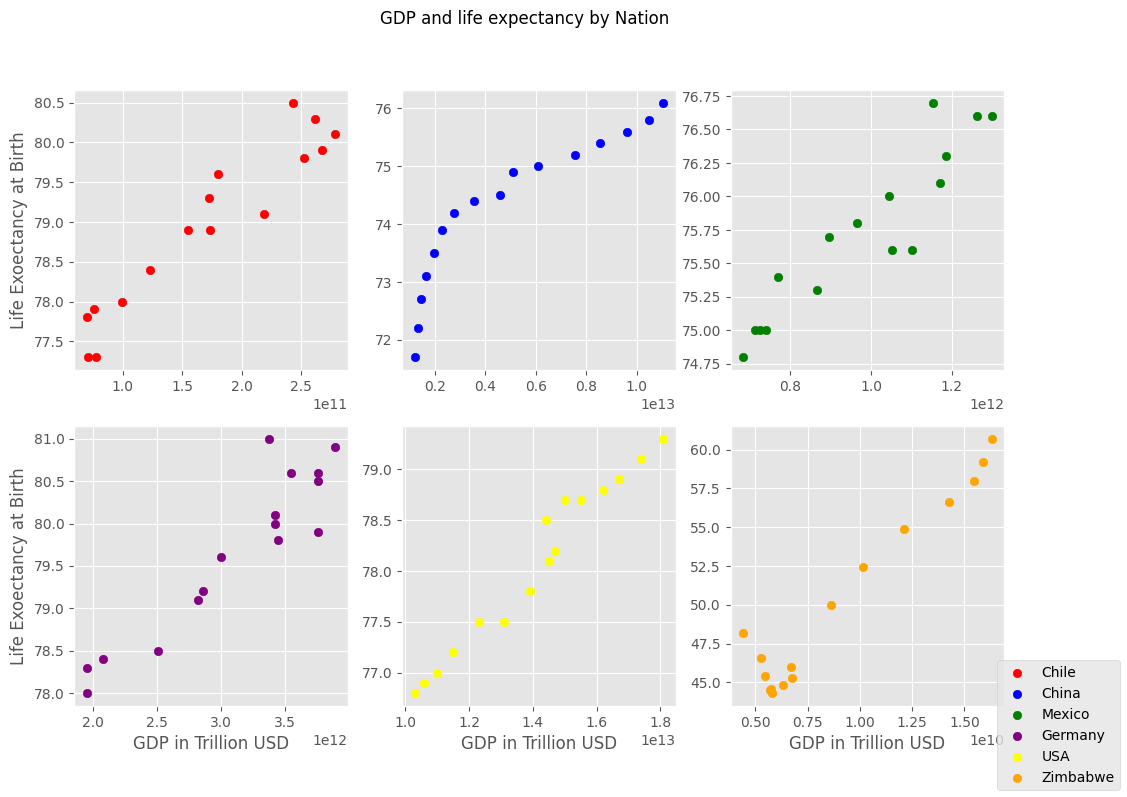

In [340]:
#3 Is there a correlation between GDP and Life expectancy?
# we can use the previous subsets for this observation 
fig, axs = plt.subplots(2,3, figsize=(12,8))
fig.suptitle('GDP and life expectancy by Nation')
axs.flatten()

plt.subplot(2,3,1)
plt.scatter(df.GDP[df.Country == 'Chile'], chile_leb, marker = 'o', color = 'red')
plt.ylabel('Life Exoectancy at Birth')

plt.subplot(2,3,2)
plt.scatter(df.GDP[df.Country =='China'], china_leb, marker = 'o', color = 'blue')

plt.subplot(2,3,3)
plt.scatter(df.GDP[df.Country =='Mexico'], mex_leb, marker = 'o', color = 'green')

plt.subplot(2,3,4)
plt.scatter(df.GDP[df.Country =='Germany'], germ_leb, marker = 'o', color = 'purple')

plt.xlabel('GDP in Trillion USD')
plt.ylabel('Life Exoectancy at Birth')

plt.subplot(2,3,5)
plt.scatter(df.GDP[df.Country =='USA'], usa_leb, marker = 'o', color = 'yellow')
plt.xlabel('GDP in Trillion USD')


plt.subplot(2,3,6)
plt.scatter(df.GDP[df.Country =='Zimbabwe'], zimb_leb, marker = 'o', color = 'orange')
plt.xlabel('GDP in Trillion USD')

fig.legend(countries, loc='lower right')
plt.show()

#Observation: From the scatter plots below it can be gathered that as GDP rises the life expectnacy rise as well. 
# This represents a positive relationship between GDP and LEB (Life Expectancy at Birth).

Life expectancy at birth by Country
Germany     79.65625
Chile       78.94375
USA         78.06250
Mexico      75.71875
China       74.26250
Zimbabwe    50.09375
Name: LEB, dtype: float64
The average GDP of each nation by Country
USA         1.407500e+13
China       4.957714e+12
Germany     3.094776e+12
Mexico      9.766506e+11
Chile       1.697888e+11
Zimbabwe    9.062580e+09
Name: GDP, dtype: float64


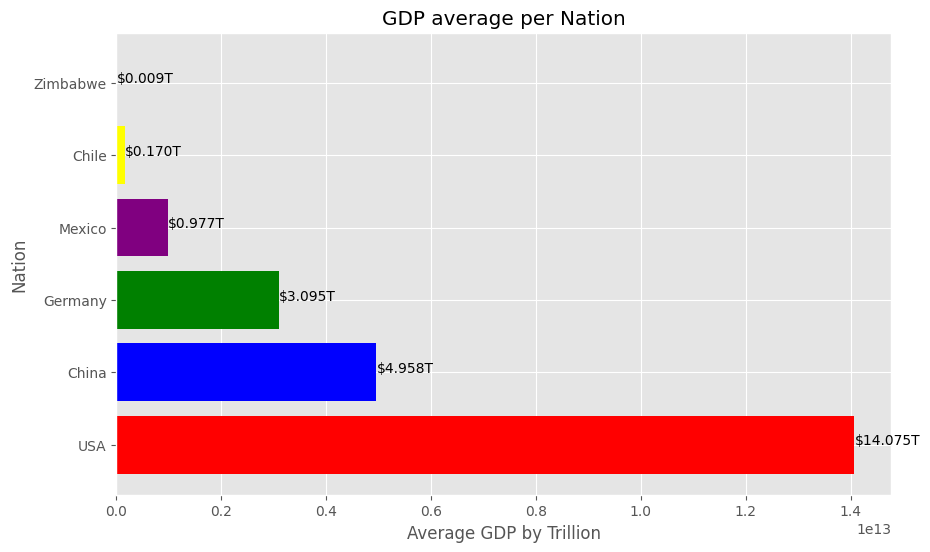

<Figure size 640x480 with 0 Axes>

In [339]:
#4 & 5 What is the average GDP & Life Expectancy of each nation?

gdp_means = df.groupby('Country')['GDP'].mean().sort_values(ascending=False)
print('Life expectancy at birth by ' 
      + str(leb_avg))
print('The average GDP of each nation by ' + str(gdp_means))
plt.figure(figsize=(10,6))
plt.title('GDP average per Nation')
labels = list(colors.keys())
values = list(colors.values())
bar_colors = [colors[label] for label in labels]
x_values = list(gdp_means.index)
y_values = list(gdp_means.values)
style.use('ggplot')
plt.barh(x_values, y_values, color=bar_colors)
plt.xlabel('Average GDP by Trillion')
plt.ylabel('Nation')
xticks = ax.get_xticks()
xticklabels = [round(tick / 1e12) for tick in xticks]
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
for index, value in enumerate(y_values):
    plt.text(value, index, f"${value / 1000000000000:.3f}T")
plt.show()
plt.clf()

#Observation: From observing our bar graph we can see that USA has the highest GDP by a wide margin, while Zimbabwe has the lowest. 
#There is a correlation between Zimbabwe's GDP and life expectancy both being the lowest by a good margin. 
#But USA having the hgihest GDP does not correlate with it have the longest life expectancy as it is third on the list behind Chile and Germany.
#So the correlation might only be applicable if you have a robustly low GDP your Life expectancy is likely to be lower as well.